<a href="https://colab.research.google.com/github/luan1199/colab_projects/blob/master/Training%20with%20some%20parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, ReLU, Softmax
import tensorflow as tf
import cv2
import os
import time
import random
from keras.utils.np_utils import to_categorical
import glob
from tqdm import tqdm
import keras
from keras.models import model_from_json
from keras.models import load_model
from keras import layers
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import optimizers

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Using TensorFlow backend.


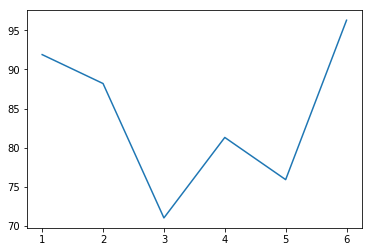

In [0]:
plt.plot([1,2,3,4,5,6], [91.9, 88.2, 71, 81.3, 75.9, 96.3])

In [0]:
training_data = []
img_size = 224
    
DATADIR = "drive/My Drive/separated_imgs/train/"
CATEGORIES = ["c0/","c1/","c2/","c3/","c4/"]
'''
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats
        print('loading...')
        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
        for img in glob.glob(path+ "*"):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE) #os.path.join(img), cv2.IMREAD_GRAYSCALE)<<<<<<<<<<-
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])

            except Exception as e:
                print(e)
        

        for img in glob.glob(path+ "*"):#adicionando imagens flipadas.
            try:
                img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
                flipped_array = np.fliplr(img_array)
                flipped_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([flipped_array, class_num])
            except Exception as e:
                print(e)
'''
def create_training_data():

  for category in CATEGORIES:  # do dogs and cats
      print('loading...')
      path = os.path.join(DATADIR,category)  # create path to dogs and cats
      class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
      for img in glob.glob(path+ "*"):  # iterate over each image per dogs and cats
          try:
              img_array = cv2.imread(img, cv2.IMREAD_COLOR) #os.path.join(img), cv2.IMREAD_GRAYSCALE)<<<<<<<<<<-
              new_array = cv2.resize(img_array, (img_size, img_size),3)
              training_data.append([img_array, class_num])
          except Exception as e:
              print(e)

  
  
create_training_data()


random.shuffle(training_data)

loading...
loading...
loading...
loading...
loading...


In [0]:

testing_data = []

DATADIR2 = "drive/My Drive/separated_imgs/val/"

def create_testing_data():
  for category in CATEGORIES:
    print('loading, my dude...')
    path = os.path.join(DATADIR2, category)
    class_num = CATEGORIES.index(category)
    for img in glob.glob(path+ "*"):
        try:
            img_array = cv2.imread(img, cv2.IMREAD_REDUCED_COLOR_4) #os.path.join(img), cv2.IMREAD_GRAYSCALE)<<<<<<<<<<-
            new_array = cv2.resize(img_array, (img_size, img_size))
            testing_data.append([new_array, class_num])
        except Exception as e:
          print(e)
create_testing_data()

loading, my dude...


KeyboardInterrupt: ignored

In [0]:
#training data
    
x_train = []
y_train = []
    
for features,label in training_data:
  x_train.append(features)
  y_train.append(label)
    
x_train = np.array(x_train).reshape(-1, img_size, img_size, 3)



x_train = x_train /255.0



In [0]:
x_train[0].shape

(120, 160, 3)

In [0]:
#test data
x_test = []
y_test = []
    
for features,label in testing_data:
    x_test.append(features)
    y_test.append(label)
    
x_test = np.array(x_test)reshape(-1, img_size, img_size, 3)

x_test = x_test/255.0

Type one, no batch-normalization

In [0]:
#type 1 without batch-normalization

es = EarlyStopping(monitor='val_loss',
                   mode='min' ,
                   verbose=1,
                  patience=3)


model_type_1_0 = Sequential()

model_type_1_0.add(Conv2D(64, (3,3),
          padding='same',
          input_shape=x_train.shape[1:], activation='relu'))#64

model_type_1_0.add(MaxPooling2D(pool_size=(2,2)))#M

model_type_1_0.add(Flatten())

model_type_1_0.add(Dense(100))

model_type_1_0.add(ReLU())

model_type_1_0.add(Dropout(0.5))

model_type_1_0.add(Dense(100))

model_type_1_0.add(Dense(5, activation='softmax'))

#model_type_1_0.add(Softmax())

sgd = tf.keras.optimizers.SGD(lr=0.01,
                           decay=0.0,
                           momentum=0.9,
                           nesterov=True)

model_type_1_0.compile(loss='sparse_categorical_crossentropy',
                       optimizer=sgd,
                       metrics=['accuracy'])


since = time.time()


history_1_0 = model_type_1_0.fit(x_train, y_train, batch_size=16,
                  epochs=15,
                  callbacks=[es],
                  validation_split=0.1)

time_elapsed = time.time() - since

print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

Train on 7668 samples, validate on 853 samples
Epoch 1/15
7668/7668 [==============================] - 15s 2ms/sample - loss: 0.7158 - acc: 0.7167 - val_loss: 0.0946 - val_acc: 0.9613
Epoch 2/15
7668/7668 [==============================] - 14s 2ms/sample - loss: 0.1822 - acc: 0.9417 - val_loss: 0.0161 - val_acc: 0.9953
Epoch 3/15
7668/7668 [==============================] - 14s 2ms/sample - loss: 0.1027 - acc: 0.9658 - val_loss: 0.0042 - val_acc: 0.9977
Epoch 4/15
7668/7668 [==============================] - 14s 2ms/sample - loss: 0.0785 - acc: 0.9737 - val_loss: 0.0134 - val_acc: 0.9977
Epoch 5/15
7668/7668 [==============================] - 14s 2ms/sample - loss: 0.0544 - acc: 0.9815 - val_loss: 0.0040 - val_acc: 0.9977
Epoch 6/15
7668/7668 [==============================] - 14s 2ms/sample - loss: 0.0564 - acc: 0.9800 - val_loss: 0.0066 - val_acc: 0.9988
Epoch 7/15
7668/7668 [==============================] - 14s 2ms/sample - loss: 0.0468 - acc: 0.9860 - val_loss: 0.0100 - val_acc: 0

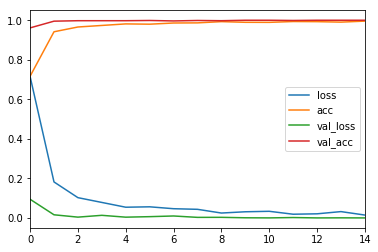

In [0]:
import pandas as pd


pd.DataFrame(history_1_0.history).plot()

In [0]:
model_type_1_0.evaluate(x_test,y_test,
                        batch_size=16,
                        verbose=1,
                        steps=None)

NameError: ignored

In [0]:
y_pred_1_0 = model_type_1_0.predict(x_test)
y_pred_1_0 = y_pred_1_0.argmax(axis=1)

In [0]:
from sklearn import metrics

confusion_1_0 = metrics.confusion_matrix(y_test,y_pred_1_0)
confusion_1_0

array([[598,  86,   5,   4,   0],
       [276, 319,   0,  51,   0],
       [348, 168, 129,   5,   1],
       [296, 176,   0, 138,   3],
       [416,  65,   0,   0, 140]])

In [0]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.31      0.86      0.46       693
           1       0.39      0.49      0.44       646
           2       0.96      0.20      0.33       651
           3       0.70      0.23      0.34       613
           4       0.97      0.23      0.37       621

    accuracy                           0.41      3224
   macro avg       0.67      0.40      0.39      3224
weighted avg       0.66      0.41      0.39      3224



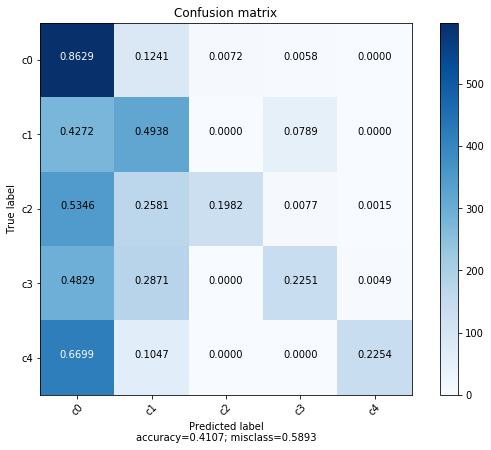

In [0]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
plot_confusion_matrix(confusion_1_0,['c0','c1','c2','c3','c4'])

In [0]:
model_json = model_type_1_0.to_json()

with open('model_type_1_0','w') as json_file:
  json_file.write(model_json)
  
model_type_1_0.save_weights('model_type_1_0.h5')

Type one, with batch-normalization.

In [0]:
#type 1 with batch-normalization
model_type_1_1 = Sequential()

model_type_1_1.add(Conv2D(64, (3,3),
          padding='same',
          input_shape=x_train.shape[1:],
                 activation='relu'))#64

keras.layers.BatchNormalization(axis=1,
                                momentum=0.9,
                                epsilon=0.001,
                                center=True,
                                scale=True,
                                beta_initializer='zeros',
                                gamma_initializer='ones',
                                moving_mean_initializer='zeros',
                                moving_variance_initializer='ones',
                                beta_regularizer=None,
                                gamma_regularizer=None,
                                beta_constraint=None,
                                gamma_constraint=None)


model_type_1_1.add(MaxPooling2D(pool_size=(2,2)))#m


model_type_1_1.add(Flatten())

model_type_1_1.add(Dense(100))

model_type_1_1.add(ReLU())

model_type_1_1.add(Dropout(0.5))

model_type_1_1.add(Dense(100))

model_type_1_1.add(Dense(5, activation='softmax'))

#model_type_1_1.add(Softmax())


'''
model_type_1_1.add(Dense(16, activation='softmax'))
'''

model_type_1_1.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])


since = time.time()


model_type_1_1.fit(x_train, y_train,
          batch_size=16,
          epochs=15,
          validation_split=0.1)


time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))


W0626 09:55:58.130382 140381263574912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



Train on 7668 samples, validate on 853 samples
Epoch 1/15
7668/7668 [==============================] - 28s 4ms/sample - loss: 1.4057 - acc: 0.3462 - val_loss: 0.9109 - val_acc: 0.5850
Epoch 2/15
7668/7668 [==============================] - 28s 4ms/sample - loss: 1.0036 - acc: 0.5404 - val_loss: 0.8019 - val_acc: 0.6553
Epoch 3/15
7668/7668 [==============================] - 28s 4ms/sample - loss: 0.7260 - acc: 0.6721 - val_loss: 0.2884 - val_acc: 0.9308
Epoch 4/15
7668/7668 [==============================] - 28s 4ms/sample - loss: 0.5317 - acc: 0.7610 - val_loss: 0.0953 - val_acc: 0.9883
Epoch 5/15
7668/7668 [==============================] - 27s 4ms/sample - loss: 0.4102 - acc: 0.8161 - val_loss: 0.0555 - val_acc: 0.9941
Epoch 6/15
7668/7668 [==============================] - 28s 4ms/sample - loss: 0.3315 - acc: 0.8618 - val_loss: 0.0200 - val_acc: 0.9977
Epoch 7/15
7668/7668 [==============================] - 28s 4ms/sample - loss: 0.2346 - acc: 0.9045 - val_loss: 0.0131 - val_acc: 0

In [0]:
model_type_1_1.evaluate(x_test,y_test,
                        batch_size=16,verbose=1,
                       steps=None)

3224/3224 [==============================] - 6s 2ms/sample - loss: 6.8154 - acc: 0.4038


[6.815355650655389, 0.40384614]

In [0]:
y_pred_1_1 = model_type_1_1.predict(x_test)
print(metrics.classification_report(y_test, y_pred_1_1.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.30      0.85      0.44       693
           1       0.37      0.49      0.42       646
           2       0.97      0.18      0.31       651
           3       0.96      0.23      0.37       613
           4       0.95      0.22      0.36       621

    accuracy                           0.40      3224
   macro avg       0.71      0.39      0.38      3224
weighted avg       0.70      0.40      0.38      3224



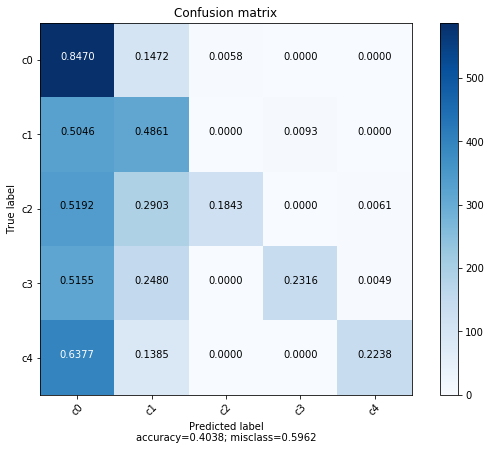

In [0]:
plot_confusion_matrix(metrics.confusion_matrix(y_test,y_pred_1_1.argmax(axis=1)),['c0','c1','c2','c3','c4'])

In [0]:
model_json = model_type_1_1.to_json()

with open('model_type_1_1','w') as json_file:
  json_file.write(model_json)
  
model_type_1_1.save_weights('model_type_1_1.h5')

type two, no batch-normalization

In [0]:
model_type_2_0 = Sequential()#type 2 without batch-normalization

model_type_2_0.add(Conv2D(64, (3,3),
          padding='same',
          input_shape=x_train.shape[1:],
                 activation='relu'))#64

model_type_2_0.add(Conv2D(32, (3,3),
                padding='same',
                activation='relu'))#32

model_type_2_0.add(MaxPooling2D(pool_size=(2,2)))#Maxpooling layer



model_type_2_0.add(Flatten())

'''
model_type_2_0.add(Dense(16, activation='softmax'))
'''

model_type_2_0.add(Dense(100))

model_type_2_0.add(ReLU())

model_type_2_0.add(Dropout(0.5))

model_type_2_0.add(Dense(100))

model_type_2_0.add(Dense(5, activation='softmax'))

#model_type_2_0.add(Softmax())


model_type_2_0.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

since = time.time()

model_type_2_0.fit(x_train, y_train,
                   batch_size=16,
                   epochs=15,
                   validation_split=0.1)

time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

Train on 7668 samples, validate on 853 samples
Epoch 1/15
7668/7668 [==============================] - 35s 5ms/sample - loss: 1.4839 - acc: 0.3279 - val_loss: 1.2771 - val_acc: 0.4115
Epoch 2/15
7668/7668 [==============================] - 34s 4ms/sample - loss: 1.2767 - acc: 0.4056 - val_loss: 1.1805 - val_acc: 0.4197
Epoch 3/15
7668/7668 [==============================] - 34s 4ms/sample - loss: 1.1843 - acc: 0.4461 - val_loss: 0.8372 - val_acc: 0.7843
Epoch 4/15
7668/7668 [==============================] - 34s 4ms/sample - loss: 0.9582 - acc: 0.5608 - val_loss: 0.5997 - val_acc: 0.8382
Epoch 5/15
7668/7668 [==============================] - 34s 4ms/sample - loss: 0.6674 - acc: 0.7012 - val_loss: 0.1483 - val_acc: 0.9812
Epoch 6/15
7668/7668 [==============================] - 34s 4ms/sample - loss: 0.4048 - acc: 0.8379 - val_loss: 0.0739 - val_acc: 0.9883
Epoch 7/15
7668/7668 [==============================] - 34s 4ms/sample - loss: 0.2472 - acc: 0.9026 - val_loss: 0.0821 - val_acc: 0

In [0]:
model_type_2_0.evaluate(x_test,y_test,
                        batch_size=16,verbose=1,
                       steps=None)


3224/3224 [==============================] - 6s 2ms/sample - loss: 7.9408 - acc: 0.4175


[7.940786888522487, 0.4174938]

In [0]:
y_pred_2_0 = model_type_2_0.predict(x_test)
print(metrics.classification_report(y_test, y_pred_2_0.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.33      0.63      0.44       693
           1       0.35      0.81      0.49       646
           2       1.00      0.19      0.32       651
           3       1.00      0.20      0.33       613
           4       0.87      0.23      0.36       621

    accuracy                           0.42      3224
   macro avg       0.71      0.41      0.39      3224
weighted avg       0.70      0.42      0.39      3224



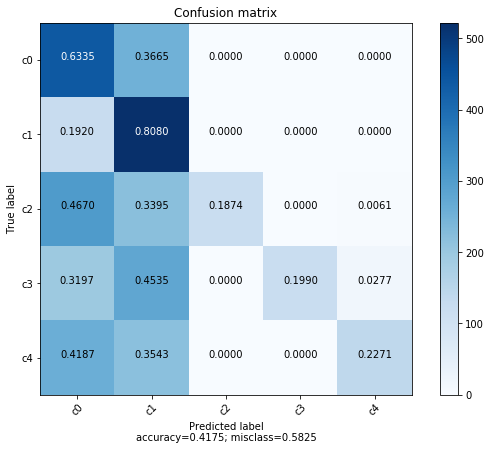

In [0]:
plot_confusion_matrix(metrics.confusion_matrix(y_test,y_pred_2_0.argmax(axis=1)),['c0','c1','c2','c3','c4'])

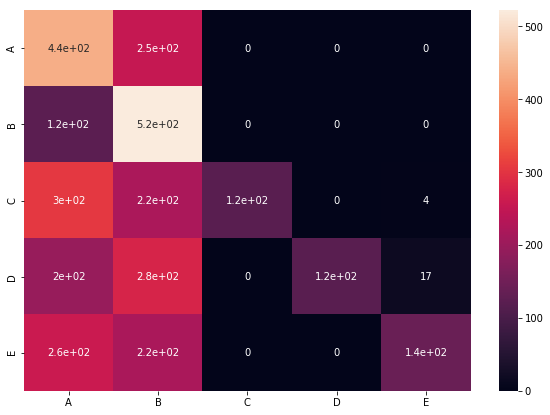

In [0]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
def plot_one_label_CM(array):
  df_cm = pd.DataFrame(array, index = [i for i in "ABCDE"],
                  columns = [i for i in "ABCDE"])
  plt.figure(figsize = (10,7))
  sn.heatmap(df_cm, annot=True)
  
plot_one_label_CM(metrics.confusion_matrix(y_test,y_pred_2_0.argmax(axis=1)))

In [0]:
model_json = model_type_2_0.to_json()

with open('model_type_2_0','w') as json_file:
  json_file.write(model_json)
  
model_type_2_0.save_weights('model_type_2_0.h5')

type three, with batch-normalization

In [0]:
#type 3 with batch-normalization
model_type_3_1 = Sequential()

model_type_3_1.add(Conv2D(128, (3,3),
                   padding='same',
                   input_shape=x_train.shape[1:],
                   activation='relu'))#128

keras.layers.BatchNormalization(axis=1,
                                momentum=0.9,
                                epsilon=0.001,
                                center=True,
                                scale=True,
                                beta_initializer='zeros',
                                gamma_initializer='ones',
                                moving_mean_initializer='zeros',
                                moving_variance_initializer='ones',
                                beta_regularizer=None,
                                gamma_regularizer=None,
                                beta_constraint=None,
                                gamma_constraint=None)#B

model_type_3_1.add(Conv2D(64, (3,3),
                   padding='same',
                   activation='relu'))#64


keras.layers.BatchNormalization(axis=1,
                                momentum=0.9,
                                epsilon=0.001,
                                center=True,
                                scale=True,
                                beta_initializer='zeros',
                                gamma_initializer='ones',
                                moving_mean_initializer='zeros',
                                moving_variance_initializer='ones',
                                beta_regularizer=None,
                                gamma_regularizer=None,
                                beta_constraint=None,
                                gamma_constraint=None)#B

model_type_3_1.add(MaxPooling2D(pool_size=(2,2)))#M


model_type_3_1.add(Conv2D(64, (3,3),
                   padding='same',
                   activation='relu'))#64

keras.layers.BatchNormalization(axis=1,
                                momentum=0.9,
                                epsilon=0.001,
                                center=True,
                                scale=True,
                                beta_initializer='zeros',
                                gamma_initializer='ones',
                                moving_mean_initializer='zeros',
                                moving_variance_initializer='ones',
                                beta_regularizer=None,
                                gamma_regularizer=None,
                                beta_constraint=None,
                                gamma_constraint=None)#B

model_type_3_1.add(Conv2D(32, (3,3),
                   padding='same',
                   activation='relu'))#32

keras.layers.BatchNormalization(axis=1,
                                momentum=0.9,
                                epsilon=0.001,
                                center=True,
                                scale=True,
                                beta_initializer='zeros',
                                gamma_initializer='ones',
                                moving_mean_initializer='zeros',
                                moving_variance_initializer='ones',
                                beta_regularizer=None,
                                gamma_regularizer=None,
                                beta_constraint=None,
                                gamma_constraint=None)#B

model_type_3_1.add(MaxPooling2D(pool_size=(2,2)))#M


model_type_3_1.add(Flatten())

'''
model_type_3_1.add(Dense(16, activation='softmax'))
'''

model_type_3_1.add(Dense(100))

model_type_3_1.add(ReLU())

model_type_3_1.add(Dropout(0.5))

model_type_3_1.add(Dense(100))

model_type_3_1.add(Dense(5, activation='softmax'))

#model_type_3_1.add(Softmax())

model_type_3_1.compile(loss='sparse_categorical_crossentropy',
                       optimizer='sgd',
                       metrics=['accuracy']
                      )


since = time.time()


history = model_type_3_1.fit(x_train, y_train,
          batch_size=16,
          epochs=15,
          validation_split=0.1)


time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))


Train on 7668 samples, validate on 853 samples
Epoch 1/15
7668/7668 [==============================] - 64s 8ms/sample - loss: 1.4023 - acc: 0.3629 - val_loss: 1.1059 - val_acc: 0.5686
Epoch 2/15
7668/7668 [==============================] - 64s 8ms/sample - loss: 0.6334 - acc: 0.7465 - val_loss: 0.1207 - val_acc: 0.9707
Epoch 3/15
7668/7668 [==============================] - 64s 8ms/sample - loss: 0.1900 - acc: 0.9340 - val_loss: 0.0764 - val_acc: 0.9719
Epoch 4/15
7668/7668 [==============================] - 64s 8ms/sample - loss: 0.1033 - acc: 0.9682 - val_loss: 0.0115 - val_acc: 0.9977
Epoch 5/15
7668/7668 [==============================] - 64s 8ms/sample - loss: 0.0690 - acc: 0.9756 - val_loss: 0.0122 - val_acc: 0.9953
Epoch 6/15
7668/7668 [==============================] - 64s 8ms/sample - loss: 0.0455 - acc: 0.9841 - val_loss: 0.0073 - val_acc: 0.9977
Epoch 7/15
7668/7668 [==============================] - 63s 8ms/sample - loss: 0.0461 - acc: 0.9832 - val_loss: 0.0065 - val_acc: 0

In [0]:
model_type_3_1.evaluate(x_test,y_test,
                        batch_size=16,verbose=1,
                       steps=None)

3224/3224 [==============================] - 10s 3ms/sample - loss: 10.5839 - acc: 0.3790


[10.583868583068067, 0.37903225]

In [0]:
y_pred_3_1 = model_type_3_1.predict(x_test)
print(metrics.classification_report(y_test, y_pred_3_1.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.30      0.79      0.43       693
           1       0.30      0.38      0.34       646
           2       0.64      0.24      0.35       651
           3       0.82      0.21      0.33       613
           4       0.88      0.23      0.36       621

    accuracy                           0.38      3224
   macro avg       0.59      0.37      0.36      3224
weighted avg       0.58      0.38      0.36      3224



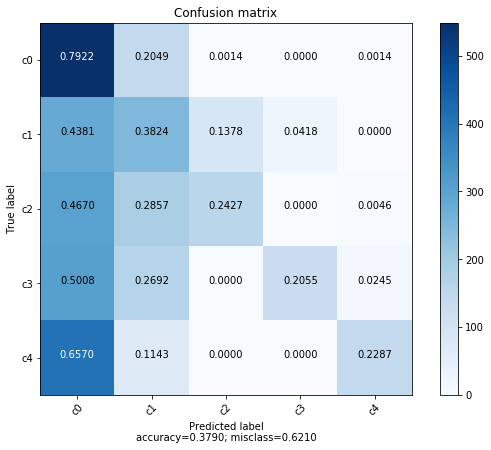

In [0]:
plot_confusion_matrix(metrics.confusion_matrix(y_test,y_pred_3_1.argmax(axis=1)),['c0','c1','c2','c3','c4'])

In [0]:
 model_json = model_type_3_1.to_json()
with open('model_type_3_1','w') as json_file:
  json_file.write(model_json)
  
model_type_3_1.save_weights('model_type_3_1.h5')

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = x_train[0]

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

NameError: ignored